In [4]:
import os, sys
import numpy as np
import matplotlib.pyplot as plt

In [5]:
sys.path.append('../readmaroc/')

In [6]:
from maroc_data import MarocData

In [7]:
pedestal = '../readmaroc/data/farm/Pedestal_test.dat'

In [8]:
run_pedestal = MarocData(pedestal)

In [9]:
class Header:
    def __init__(self, header):
        self.header = header
    @property
    def ip(self):
        return self.header[0]
    @property
    def trigg_n_TS(self):
        return self.header[1]
    @property
    def TS(self):
        return self.header[2]
    @property
    def TS_fine_n(self):
        return self.header[3]
    @property
    def TS_fine(self):
        return self.header[4:14]
    @property
    def orcounts_n(self):
        return self.header[14]
    @property
    def orcounts(self):
        return self.header[15:25]
    @property
    def trg_ADC_n(self):
        return self.header[25]
    @property
    def trg_ADC(self):
        return self.header[26:31]
    @property
    def timestamp_ADC_n(self):
        return self.header[31]
    @property
    def timestamp_ADC(self):
        return self.header[32:37]
    @property
    def ADC_samples(self):
        return self.header[37:39]

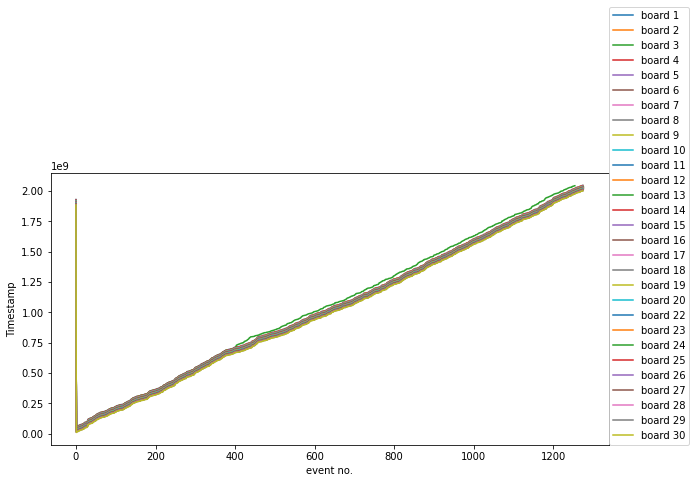

In [11]:
run_new = run_pedestal
plt.figure(figsize=(10,5))
for b in run_new.active_boards:
    data = run_new.header_board(b)
    ts = [Header(i).TS for i in data]
    n_events = len(data)
    plt.plot(np.arange(n_events), np.asarray(ts), label='board {}'.format(b))
    
plt.xlabel('event no.')
plt.ylabel('Timestamp')
plt.legend(loc=(1,0))
plt.show()

In [33]:
run_low = MarocData('../readmaroc/data/farm/Run000081526.dat')

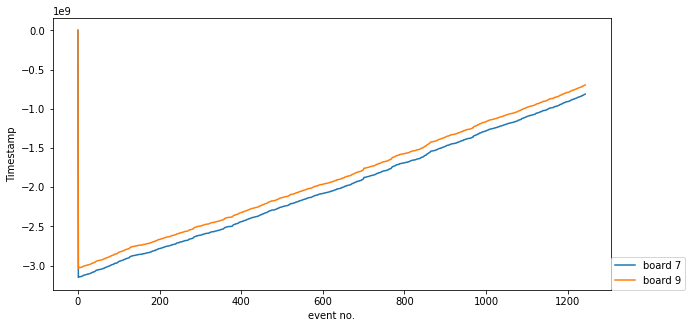

In [105]:
plt.figure(figsize=(10,5))

data1 = run_low.header_board(7)
data2 = run_low.header_board(9)
ts1 = np.asarray([Header(i).TS for i in data1])
ts2 = np.asarray([Header(i).TS for i in data2])
n_events1 = len(data1)
n_events2 = len(data2)
plt.plot(np.arange(n_events1), ts1-ts1[0], label='board {}'.format(7))
plt.plot(np.arange(n_events2), ts2-ts2[0], label='board {}'.format(9))
    
plt.xlabel('event no.')
plt.ylabel('Timestamp')
plt.legend(loc=(1,0))
plt.show()

In [35]:
np.asarray(data1)[:,2]

array([3194874068,   44915341,   53575498, ..., 2377836411, 2379160573,
       2381213680])

In [36]:
np.asarray(data2)[:,2]

array([3074646632,   41845211,   50505368, ..., 2374766282, 2376090443,
       2378143551])

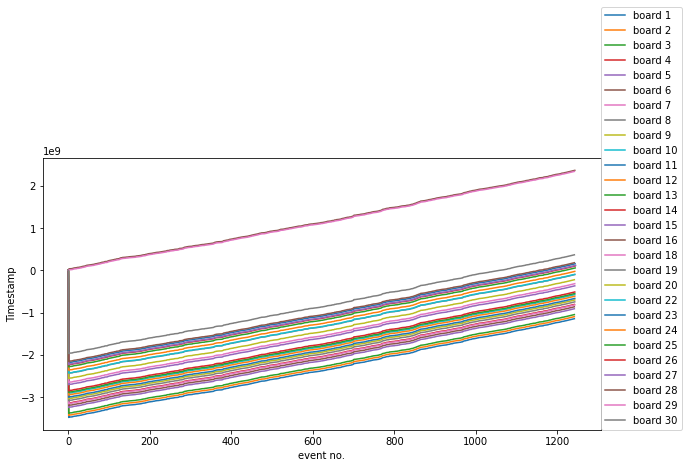

In [98]:
run_new = run_low
plt.figure(figsize=(10,5))
for b in run_new.active_boards:
    data = run_new.header_board(b)
    ts = [Header(i).TS for i in data]
    n_events = len(data)
    plt.plot(np.arange(n_events), np.asarray(ts)-ts[0], label='board {}'.format(b))
plt.xlabel('event no.')
plt.ylabel('Timestamp')
plt.legend(loc=(1,0))
plt.show()

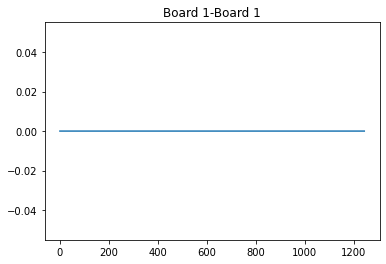

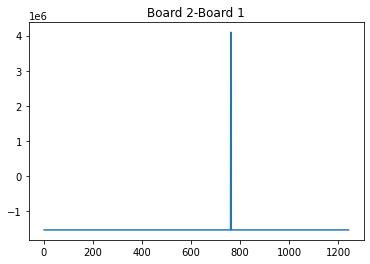

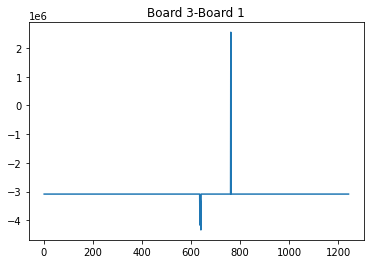

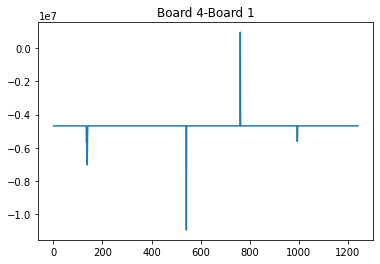

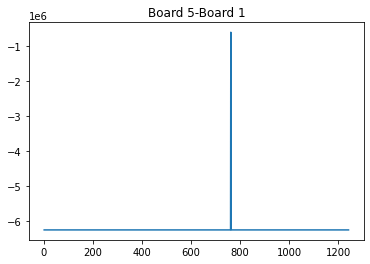

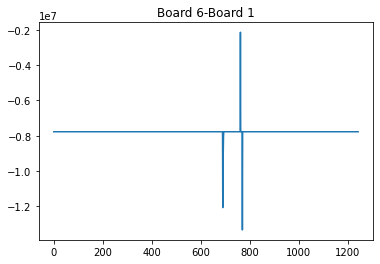

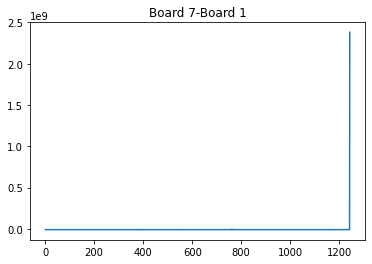

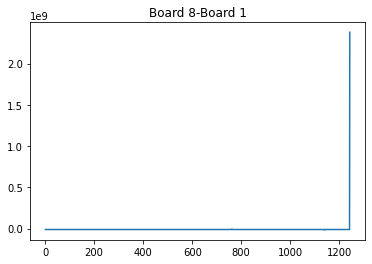

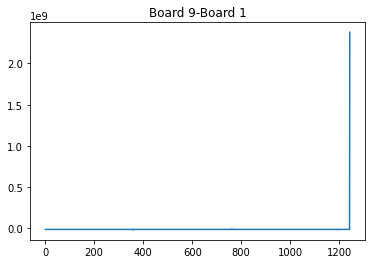

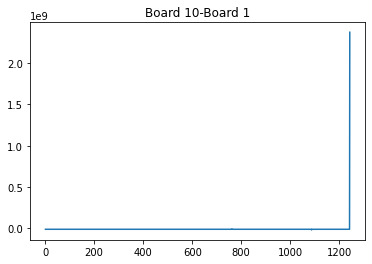

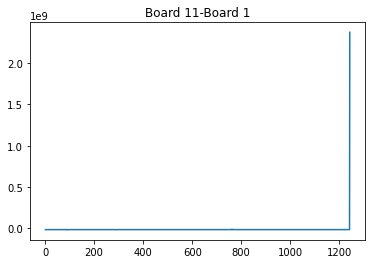

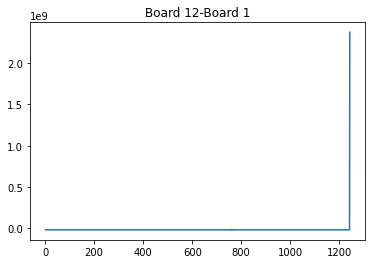

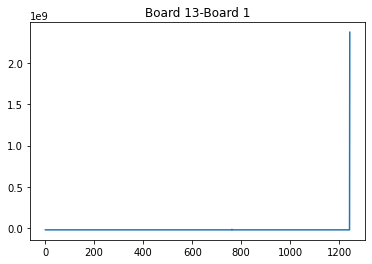

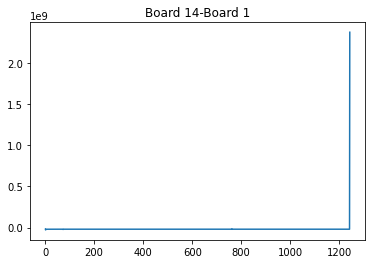

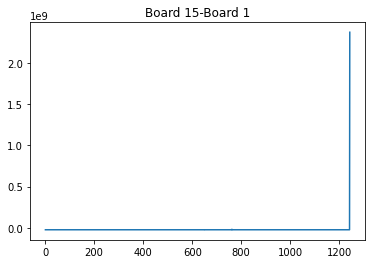

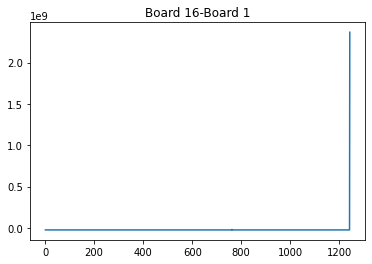

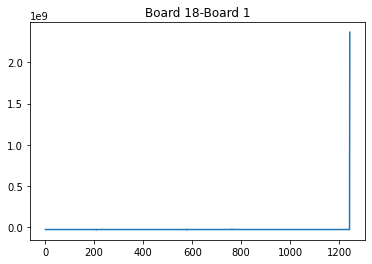

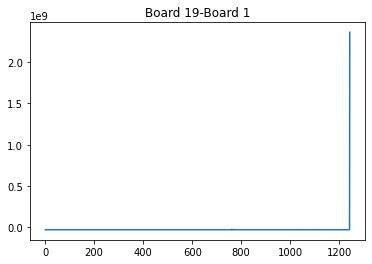

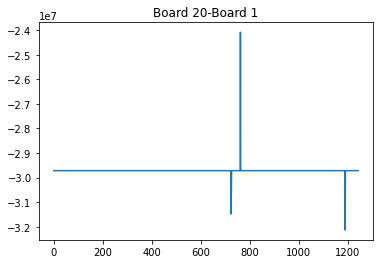

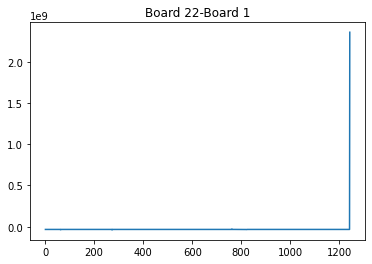

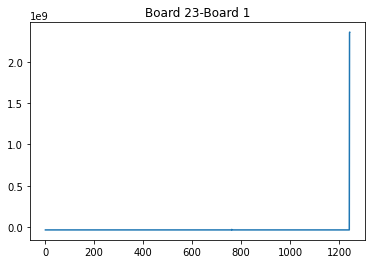

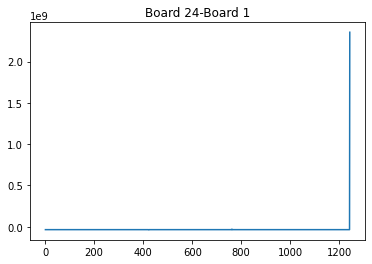

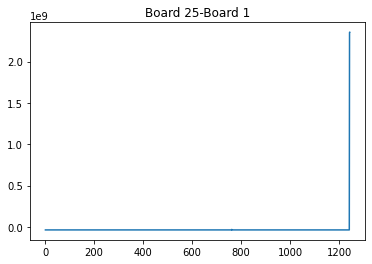

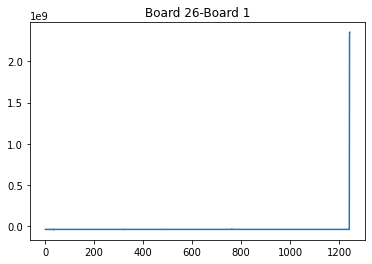

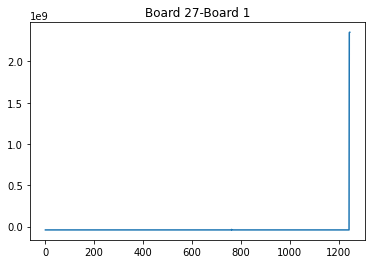

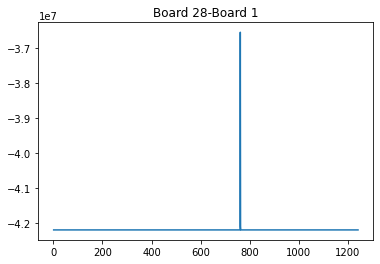

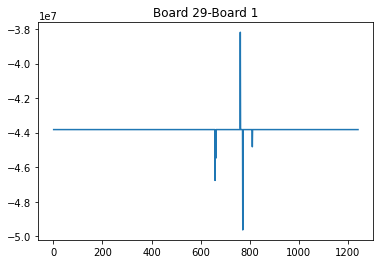

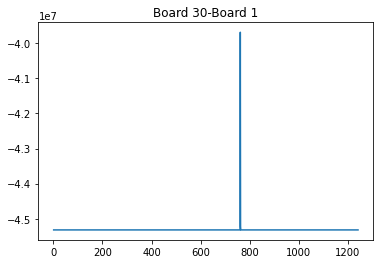

In [89]:

for b in run_low.active_boards:
    ref = np.asarray([Header(i).TS for i in run_low.header_board(1)])
    data = run_low.header_board(b)
    ts = np.asarray([Header(i).TS for i in data])
    n_events = len(data)
    if n_events == ref.shape[0]:
        
        plt.plot(np.arange(n_events)[1:], (ts-ref)[1:])
        plt.title('Board {}-Board 1'.format(b))
        plt.show()
    else:
        padded_ref = np.pad(ref, (0, n_events-ref.shape[0]), 'constant')
        plt.plot(np.arange(n_events)[1:], (ts-padded_ref)[1:])
        plt.title('Board {}-Board 1'.format(b))
        plt.show()

In [ ]:
for b in run_low.active_boards:
    data = run_low.header_board(b)
    ts = np.asarray([Header(i).TS for i in data])

In [85]:
ref = np.asarray([Header(i).TS for i in run_low.header_board(1)])

In [86]:
ts = np.asarray([Header(i).TS for i in run_low.header_board(2)])

In [87]:
np.intersect1d(ref, ts)

array([], dtype=int64)